Optimization terminated successfully.
         Current function value: 767.971359
         Iterations: 62
         Function evaluations: 124


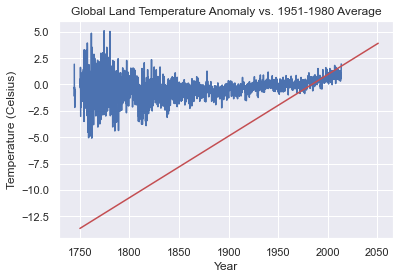

In [2]:
import numpy as np
import seaborn as sns
from scipy.optimize import fmin
import matplotlib.pyplot as plt
sns.set()

# download the file from web

def download(url,filePath):
    import urllib.request
    import shutil
    with urllib.request.urlopen(url) as response, open(filePath, 'wb') as out_file:
        shutil.copyfileobj(response, out_file)
    return None

filePath = "./usaTemperatureHistory.txt"
download( url = "https://www.cdslab.org/recipes/programming/regression-predicting-future-global-land-temperature/usaTemperatureHistory.txt"
        , filePath = filePath
        )

# parse the file contents
dates = []
anomalies = []
with open(filePath,"r") as file:
    fileLines = file.readlines()
    dates = []
    anomalies = []
    for line in fileLines[70:]:
        year = np.double(line[0:6])
        month = np.double(line[7:12])
        tempDiff = np.double(line[13:22])
        dates.append( year + month/13 )
        anomalies.append(tempDiff)

class Anomaly():
    param = None #intercept, slope, sigma
    def __init__(self,dates, anomalies):
        self.dates = np.double(dates)
        self.anomalies = np.double(anomalies)
    def predict(self,dates):
        return self.param[1]*dates \
             + self.param[0] 
    def getLogProb(self,dates,anomalies):
        return -0.9189385332046727 - np.log(self.param[2]) \
               - .5 * ( (anomalies - self.predict(dates))/self.param[2] )**2
    def getLogLike(self,param):
        self.param = param
        return np.sum(self.getLogProb(self.dates,self.anomalies))
    def getNegLogLike(self,param):
        return -self.getLogLike(param)

startRow = 2700
anomaly = Anomaly( dates = dates[startRow:]
                 , anomalies = anomalies[startRow:]
                 )
bestParam = fmin( func = anomaly.getNegLogLike
    , x0 = [-100, 1, 1])

anomaly.param = bestParam
dates_range = np.linspace(1750,2051,1000)

# make figure

fig = plt.figure()
ax = fig.gca()
plt.plot(dates,anomalies)
plt.plot(dates_range,anomaly.predict(dates_range),"r")
ax.set_xlabel("Year")
ax.set_ylabel("Temperature (Celsius)")
plt.title("Global Land Temperature Anomaly vs. 1951-1980 Average")
plt.savefig("GlobalLandTemperatureAnomaly2050Python.png")
plt.show()